In [1]:

import pandas as pd
import numpy as  np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [5]:
data = pd.read_csv("data/raw/LifeExpectancyData.csv")
data.info()

# Get a summary of missing values
# data.isnull().sum()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
# group the data by country, iterate through each country, get a list of which columns have missing values per country
bycountry = data.groupby("Country")
for name, group in bycountry:
    print("COUNTRY: ", name, "\n")
    # print(group.columns[group.isnull().any()].tolist())
    nanlist = [col for col in group.columns if group[col].isnull().any()]
    print(nanlist)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87f77096a0>,
      dtype=object)

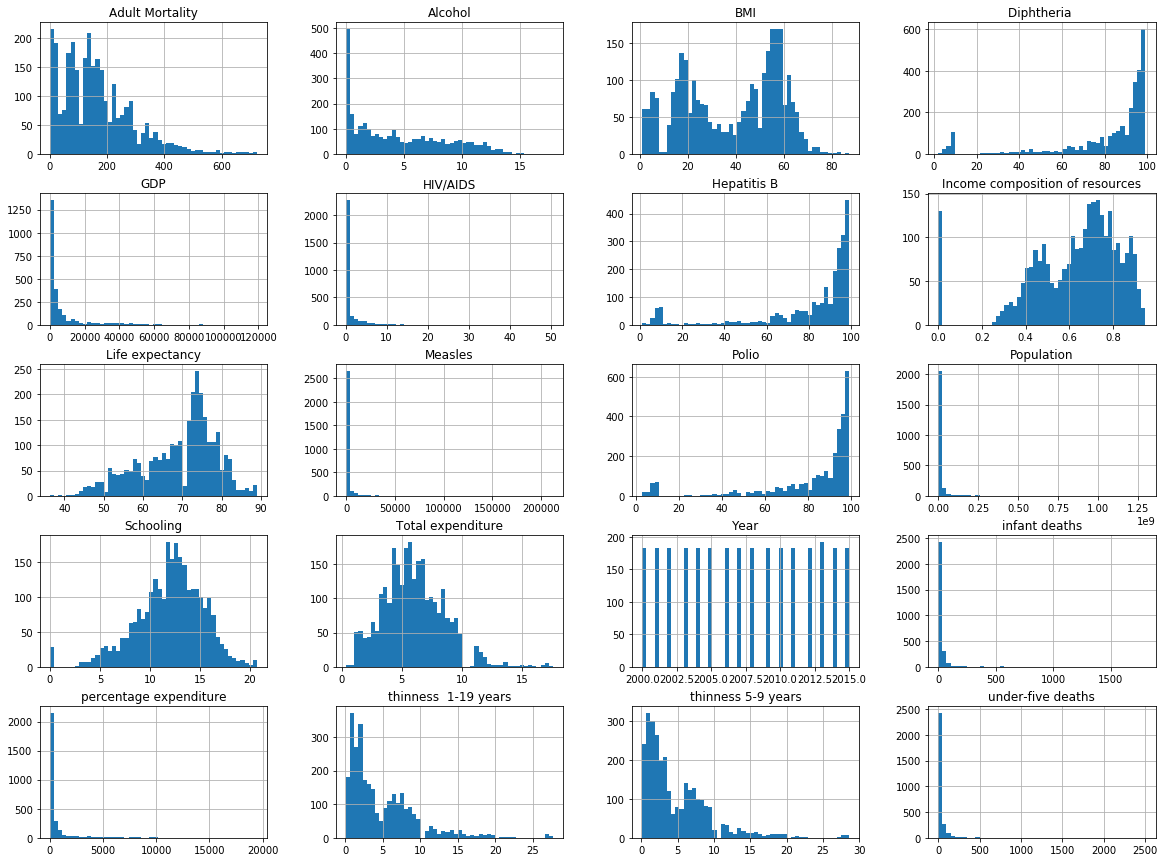

In [10]:
#Histogram shows # of instances (on vertical axis) that have a value range (horizontal)
data.hist(bins = 50, figsize=(20,15))

In [16]:
# Look at how much each feature correlates with Life Expectancy
# ie Life expectancy seems to go up when # of years of schooling goes up
# NOTE: this is on a raw dataset, so likely very innacurate
corr_matrix = data.corr()
corr_matrix["Life expectancy"].sort_values(ascending=False)

Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
BMI                                0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Year                               0.170033
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
thinness 5-9 years                -0.471584
thinness  1-19 years              -0.477183
HIV/AIDS                          -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy, dtype: float64

In [89]:

# --Problem 2.a --
# First we need to split the data into attributes and dependent variables
y = data.iloc[:, 3] # life expectancy is the var we are trying to predict
rawx = data.loc[:, :]
x = rawx.drop(rawx.columns[3], axis=1) # Can't drop by label so have to use index?



In [90]:
# FIXME - impute and drop before we do this (see feature-engineer.ipynb)

num_countries = data['Country'].tolist()
num_status = data['Status'].tolist()

# Use ndarray to reshape? sklearn can only with with 2d arrays and we have 3d
# 
# enc = preprocessing.OneHotEncoder(categories=[num_countries, num_status])
# X = [[num_countries], [num_status]]
# enc.fit(X)  # ValueError: Found array with dim 3. Estimator expected <= 2.

ValueError: Found array with dim 3. Estimator expected <= 2.

In [11]:
# -- Problem 2.a --
# Split the data into training and test sets
# X is a dataframe, y is a series
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size= 0.2, random_state=42)

NameError: name 'x' is not defined

In [2]:

# FIXME - Need to transform status and country from categorical values using dummy encoding 
# https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features
regressor = LinearRegression()
regressor.fit(xTrain, yTrain)


NameError: name 'xTrain' is not defined